In [28]:
import yt
from netCDF4 import Dataset
import numpy as np
import ipywidgets

In [3]:
data_filename = "data/Tomography_Models/DNA13_percent.nc"

nc_dataset = Dataset(data_filename, 'r+')
latitude = nc_dataset.variables["latitude"][:]
longitude = nc_dataset.variables["longitude"][:]
depth = 6371 - nc_dataset.variables["depth"][:][::-1]

In [4]:
data = {}

print(nc_dataset.variables["depth"])

print(nc_dataset.variables.keys())

for v in ('vp', 'vsh', 'vsv', 'vsvj'):
    print(v)
    print(nc_dataset.variables[v])
    # print(nc_dataset.variables[v].ncattrs())
    # nc_dataset.variables[v].setncattr('valid_range', [-1000.,1000.])
    # nc_dataset.variables['vp'].valid_range= [-1000.,1000.]
    # print(nc_dataset.variables[v][:])
    # data[v] = nc_dataset.variables[v][::-1,::-1,:]

<class 'netCDF4._netCDF4.Variable'>
float32 depth(depth)
    long_name: depth below earth surface
    units: kilometer
    positive: down
unlimited dimensions: 
current shape = (129,)
filling on, default _FillValue of 9.969209968386869e+36 used
dict_keys(['depth', 'latitude', 'longitude', 'vp', 'vsh', 'vsv', 'vsvj'])
vp
<class 'netCDF4._netCDF4.Variable'>
float32 vp(depth, latitude, longitude)
    long_name: P-velocity in %dVp
    valid_range: [-1000.  1000.]
    missing_value: 99999.0
    _FillValue: 99999.0
    add_offset:   0.f
    scale_factor:   2.f
unlimited dimensions: 
current shape = (129, 55, 109)
filling on
vsh
<class 'netCDF4._netCDF4.Variable'>
float32 vsh(depth, latitude, longitude)
    long_name: SH-velocity in %dVs
    valid_range: [-1000.  1000.]
    missing_value: 99999.0
    _FillValue: 99999.0
    add_offset:   0.f
    scale_factor:   2.f
unlimited dimensions: 
current shape = (129, 55, 109)
filling on
vsv
<class 'netCDF4._netCDF4.Variable'>
float32 vsv(depth, latit

In [5]:
data_filename = "data/Tomography_Models/DNA13_percent.nc"

v_names = ('vp', 'vsh', 'vsv', 'vsvj')

# for v in v_names:
#     nc_dataset.variables[v].valid_range = [-1000.0, 1000.0]

nc_dataset = Dataset(data_filename)
latitude = nc_dataset.variables["latitude"][:]
longitude = nc_dataset.variables["longitude"][:]
print(longitude)
depth = 6371 - nc_dataset.variables["depth"][:][::-1]

data = {v: nc_dataset.variables[v][::-1,::-1,:] for v in v_names}
# print(data)
bbox = np.array([[depth[0], depth[-1]],
                [latitude[0], latitude[-1]],
                [longitude[0],longitude[-1]]])
print(bbox)
ds = yt.load_uniform_grid(data, domain_dimensions = (depth.shape[0], latitude.shape[0], longitude.shape[0]),
                          bbox = bbox, length_unit=1000,
                          geometry = ("internal_geographic", ("depth", "latitude", "longitude")),
)

ds.outer_radius = yt.units.km * 6371

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: invalid scale_factor or add_offset attribute, no unpacking done...
  
yt : [INFO     ] 2022-06-27 13:47:55,718 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-27 13:47:55,719 Parameters: domain_dimensions         = [129  55 109]
yt : [INFO     ] 2022-06-27 13:47:55,720 Parameters: domain_left_edge          = [5091.   25.  234.]
yt : [INFO     ] 2022-06-27 13:47:55,721 Parameters: domain_right_edge         = [6371.   52.  288.]
yt : [INFO     ] 2022-06-27 13:47:55,722 Parameters: cosmological_simulation   = 0


[234.  234.5 235.  235.5 236.  236.5 237.  237.5 238.  238.5 239.  239.5
 240.  240.5 241.  241.5 242.  242.5 243.  243.5 244.  244.5 245.  245.5
 246.  246.5 247.  247.5 248.  248.5 249.  249.5 250.  250.5 251.  251.5
 252.  252.5 253.  253.5 254.  254.5 255.  255.5 256.  256.5 257.  257.5
 258.  258.5 259.  259.5 260.  260.5 261.  261.5 262.  262.5 263.  263.5
 264.  264.5 265.  265.5 266.  266.5 267.  267.5 268.  268.5 269.  269.5
 270.  270.5 271.  271.5 272.  272.5 273.  273.5 274.  274.5 275.  275.5
 276.  276.5 277.  277.5 278.  278.5 279.  279.5 280.  280.5 281.  281.5
 282.  282.5 283.  283.5 284.  284.5 285.  285.5 286.  286.5 287.  287.5
 288. ]
[[5091. 6371.]
 [  25.   52.]
 [ 234.  288.]]


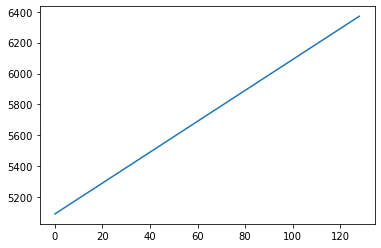

In [5]:
import matplotlib.pyplot as plt
plt.plot(depth)

In [6]:
ds.domain_width

In [7]:
ds.domain_left_edge

In [23]:
float(str(ds.domain_left_edge[0]).split(' ')[0])

5091.0

In [8]:
ds.domain_right_edge

yt : [INFO     ] 2022-06-27 13:49:10,444 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:49:10,447 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:49:10,449 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:49:10,491 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:49:10,506 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.5559999942784644 dimensionless, Max = 0.5709999799731228 dimensionless.
yt : [WARNING  ] 2022-06-27 13:49:10,507 Switching to symlog colorbar scaling.



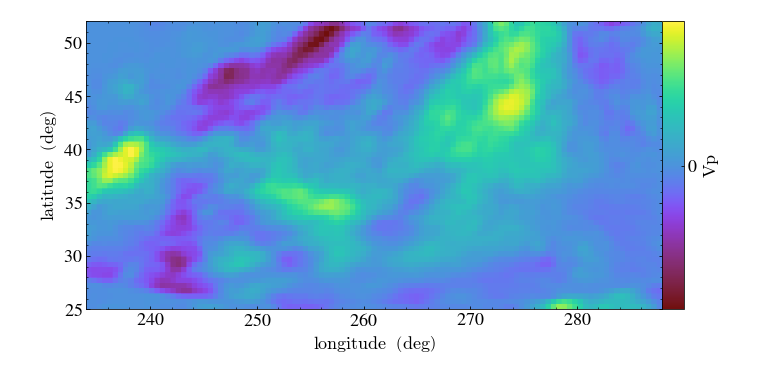


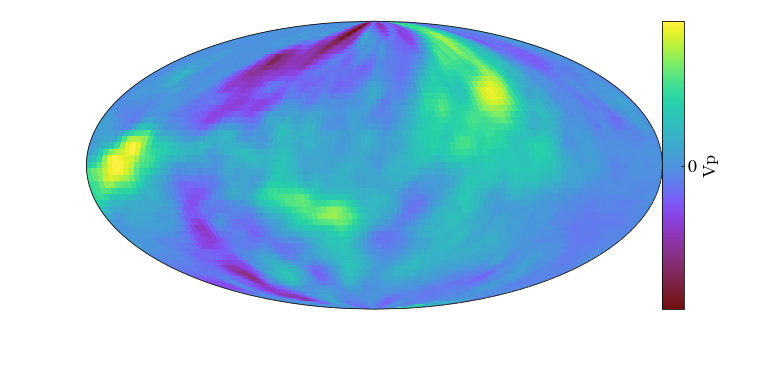

In [14]:
ds.r[5500,:,:].plot("vp").set_mpl_projection("Mollweide")

yt : [INFO     ] 2022-06-27 13:47:57,211 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:47:57,211 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:47:57,212 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:47:57,247 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:47:57,264 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.9250000119213881 dimensionless, Max = 0.6970000267032269 dimensionless.
yt : [WARNING  ] 2022-06-27 13:47:57,265 Switching to symlog colorbar scaling.



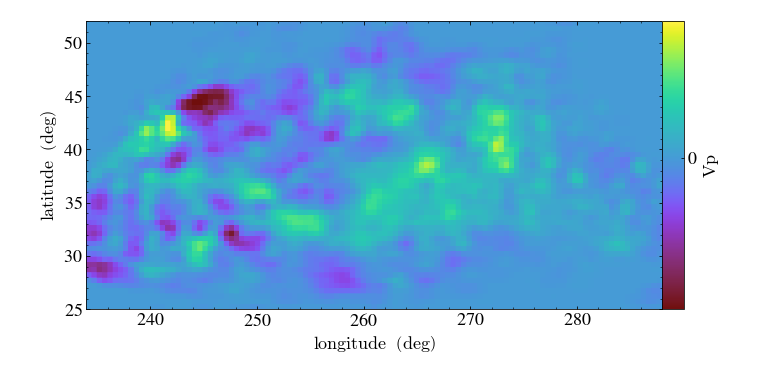


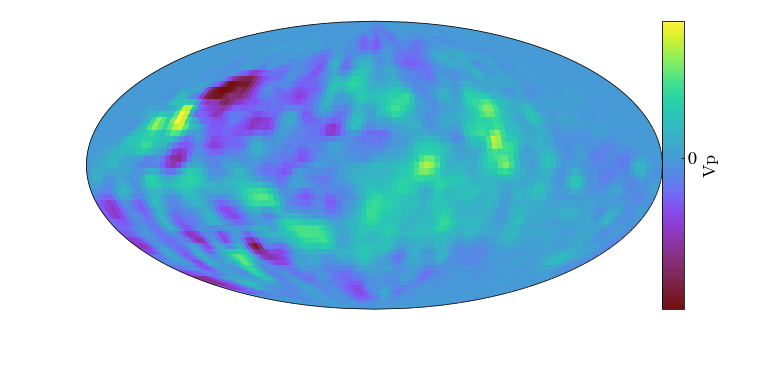

In [9]:
ds.r[6000,:,:].plot("vp").set_mpl_projection("Mollweide")

In [40]:
s = yt.SlicePlot(ds, "depth", "vp")

yt : [INFO     ] 2022-06-27 14:08:11,014 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 14:08:11,015 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 14:08:11,016 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-06-27 14:08:11,018 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 14:08:11,019 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 14:08:11,141 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 14:08:11,162 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.5870000123980575 dimensionless, Max = 0.6890000104907595 dimensionless.
yt : [WARNING  ] 2022-06-27 14:08:11,162 Switching to symlog colorbar scaling.



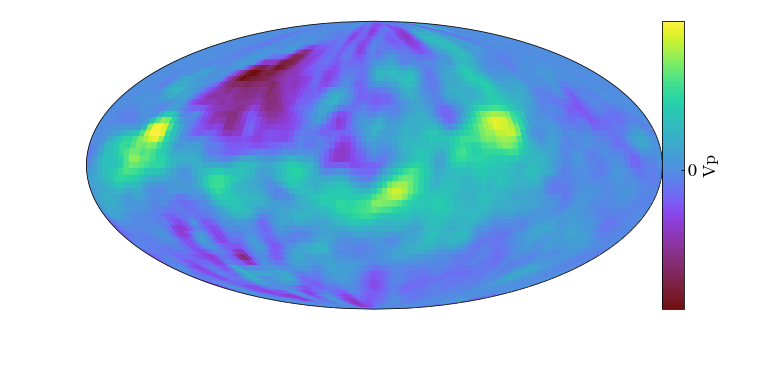

In [41]:
s

yt : [INFO     ] 2022-06-27 13:48:32,340 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:48:32,342 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:48:32,346 Making a fixed resolution buffer of (vsh) 800 by 800
yt : [INFO     ] 2022-06-27 13:48:32,383 Making a fixed resolution buffer of (('stream', 'vsh')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:48:32,397 Plotting ('stream', 'vsh'): Both positive and negative values. Min = -2.006000041962666 dimensionless, Max = 1.807999968528884 dimensionless.
yt : [WARNING  ] 2022-06-27 13:48:32,398 Switching to symlog colorbar scaling.



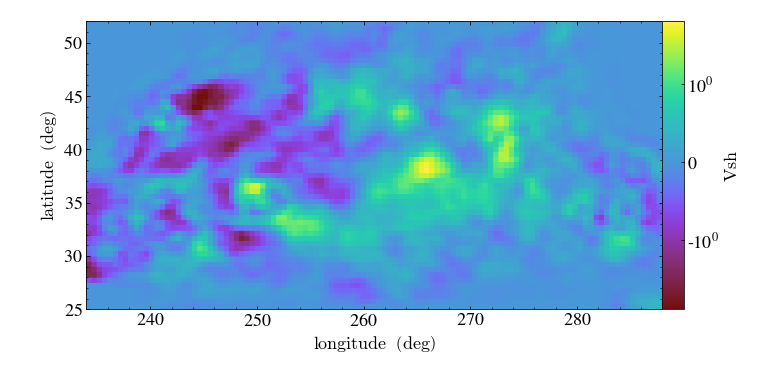


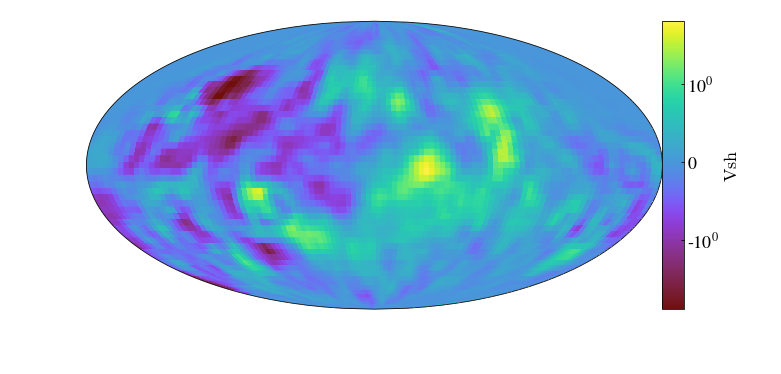

In [12]:
ds.r[6000,:,:].plot("vsh").set_mpl_projection("Mollweide")

yt : [INFO     ] 2022-06-27 13:52:54,944 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:54,946 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:54,948 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:54,983 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:54,997 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:54,997 Switching to symlog colorbar scaling.



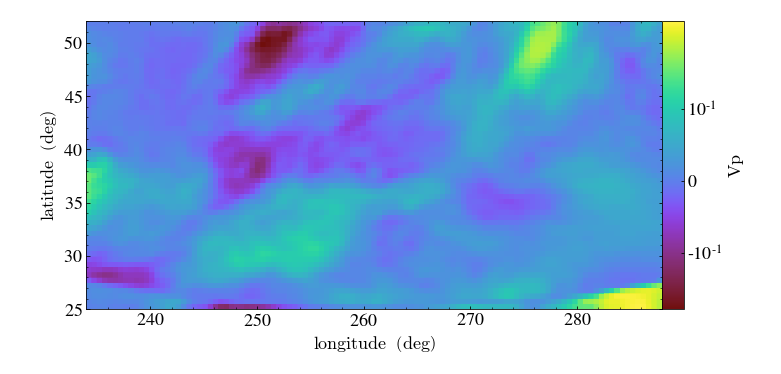

yt : [INFO     ] 2022-06-27 13:52:55,352 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:55,352 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:55,353 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:55,384 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:55,398 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:55,398 Switching to symlog colorbar scaling.



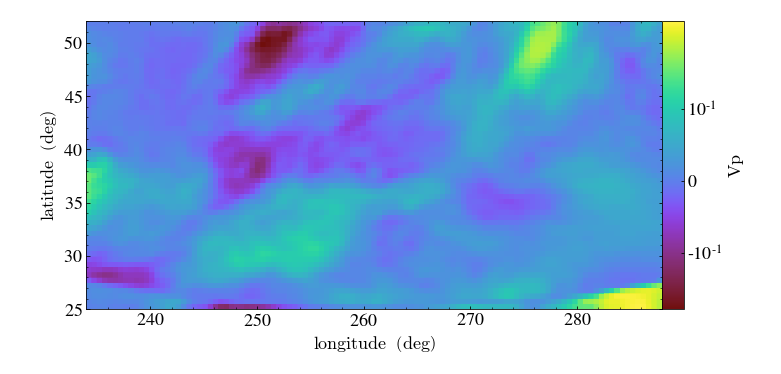

yt : [INFO     ] 2022-06-27 13:52:55,750 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:55,751 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:55,752 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:55,781 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:55,795 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:55,796 Switching to symlog colorbar scaling.



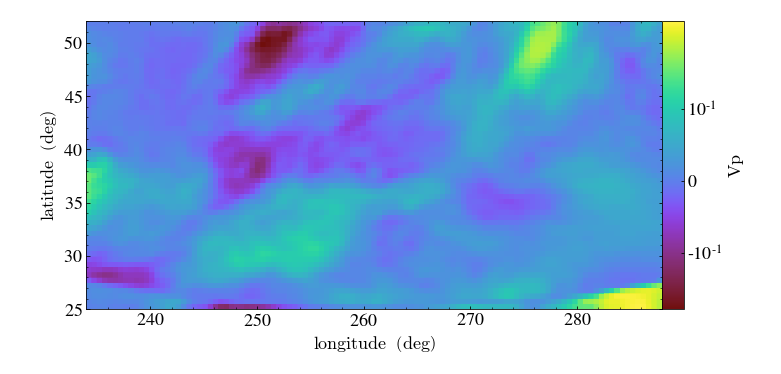

yt : [INFO     ] 2022-06-27 13:52:56,146 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:56,147 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:56,148 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:56,177 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:56,190 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:56,191 Switching to symlog colorbar scaling.



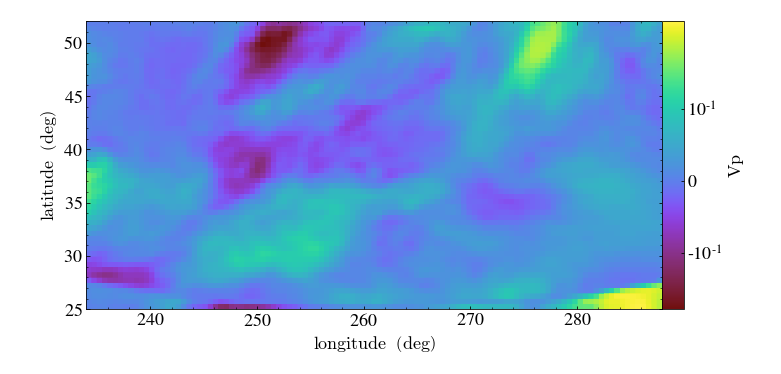

yt : [INFO     ] 2022-06-27 13:52:56,638 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:56,639 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:56,640 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:56,668 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:56,684 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:56,685 Switching to symlog colorbar scaling.



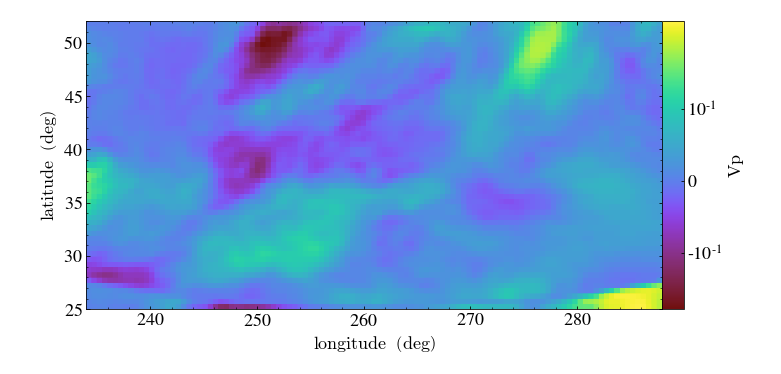

yt : [INFO     ] 2022-06-27 13:52:57,035 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:57,035 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:57,036 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:57,064 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:57,078 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:57,079 Switching to symlog colorbar scaling.



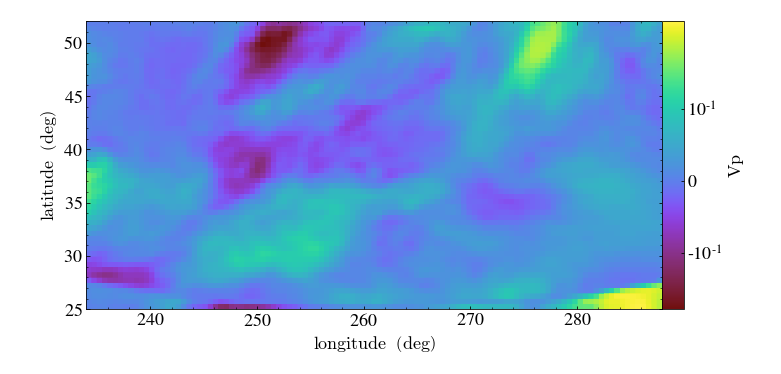

yt : [INFO     ] 2022-06-27 13:52:57,426 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:57,427 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:57,428 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:57,456 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:57,470 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:57,470 Switching to symlog colorbar scaling.



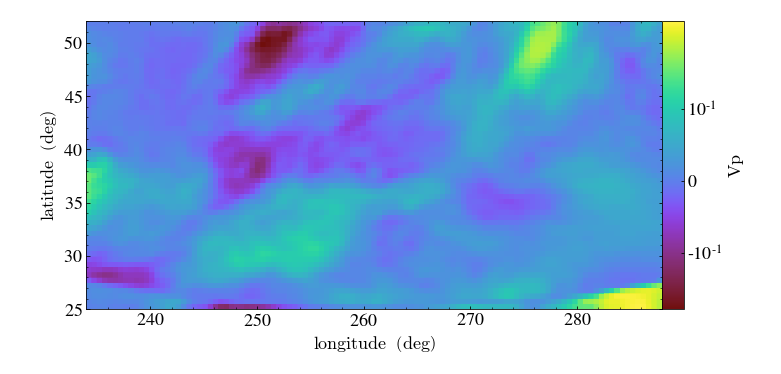

yt : [INFO     ] 2022-06-27 13:52:57,820 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:57,821 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:57,822 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:57,850 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:57,864 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:57,865 Switching to symlog colorbar scaling.



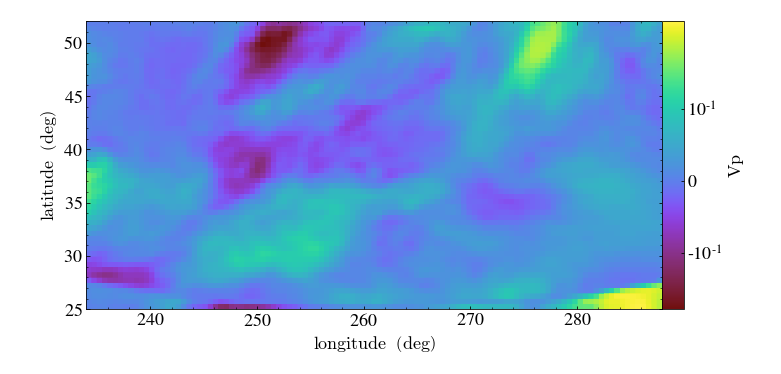

yt : [INFO     ] 2022-06-27 13:52:58,215 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:58,216 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:58,217 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:58,245 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:58,259 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:58,260 Switching to symlog colorbar scaling.



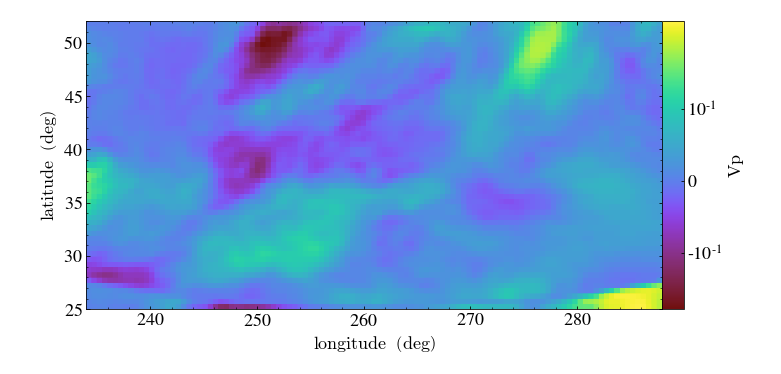

yt : [INFO     ] 2022-06-27 13:52:58,607 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:58,607 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:58,608 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:58,637 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:58,652 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.1780000030995299 dimensionless, Max = 0.3300000131132899 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:58,652 Switching to symlog colorbar scaling.



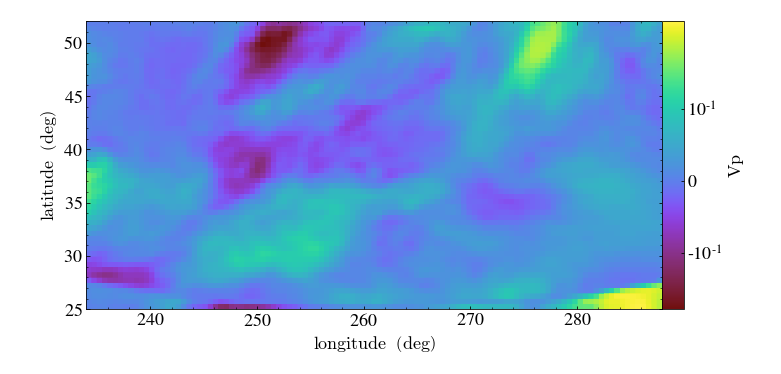

yt : [INFO     ] 2022-06-27 13:52:59,002 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:59,003 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:59,004 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:59,033 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:59,049 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:59,049 Switching to symlog colorbar scaling.



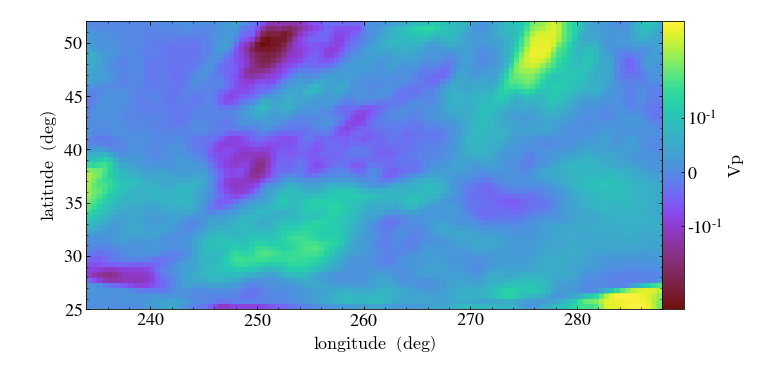

yt : [INFO     ] 2022-06-27 13:52:59,502 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:59,503 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:59,504 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:59,532 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:59,546 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:59,547 Switching to symlog colorbar scaling.



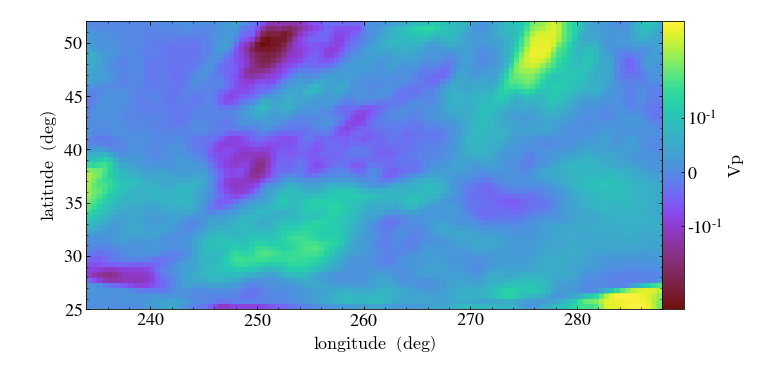

yt : [INFO     ] 2022-06-27 13:52:59,896 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:52:59,897 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:52:59,898 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:52:59,926 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:52:59,940 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:52:59,940 Switching to symlog colorbar scaling.



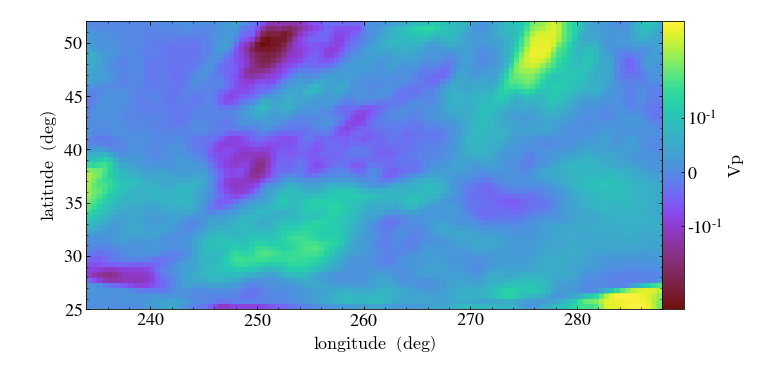

yt : [INFO     ] 2022-06-27 13:53:00,287 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:53:00,288 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:53:00,289 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:53:00,317 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:53:00,331 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:53:00,332 Switching to symlog colorbar scaling.



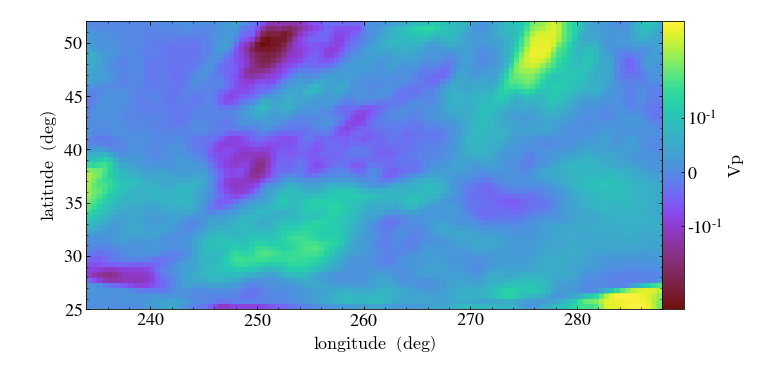

yt : [INFO     ] 2022-06-27 13:53:00,684 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:53:00,684 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:53:00,685 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:53:00,714 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:53:00,727 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:53:00,728 Switching to symlog colorbar scaling.



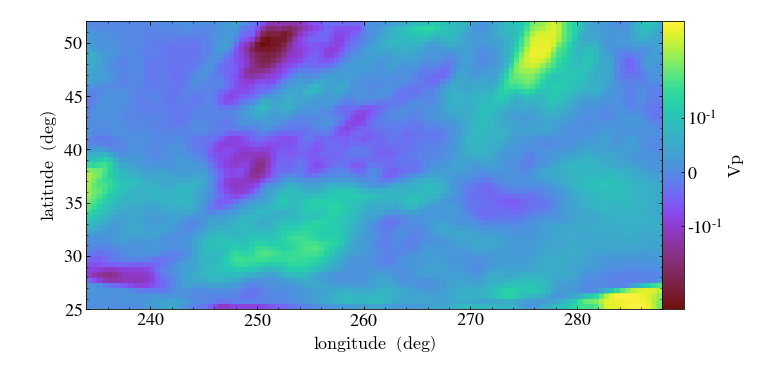

yt : [INFO     ] 2022-06-27 13:53:01,078 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:53:01,079 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:53:01,080 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:53:01,108 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:53:01,126 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:53:01,126 Switching to symlog colorbar scaling.



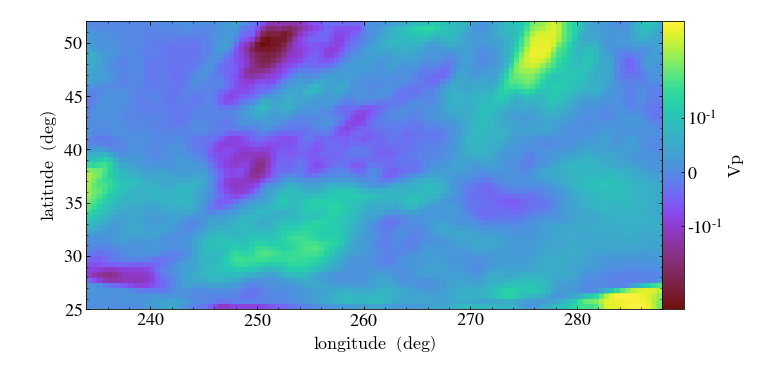

yt : [INFO     ] 2022-06-27 13:53:01,483 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:53:01,484 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:53:01,484 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:53:01,513 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:53:01,535 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:53:01,536 Switching to symlog colorbar scaling.



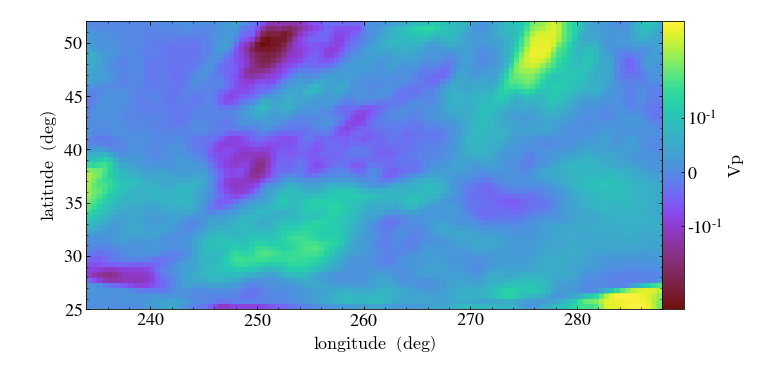

yt : [INFO     ] 2022-06-27 13:53:01,897 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-27 13:53:01,897 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-27 13:53:01,898 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-27 13:53:01,927 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-27 13:53:01,941 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.2529999911786382 dimensionless, Max = 0.3289999961855701 dimensionless.
yt : [WARNING  ] 2022-06-27 13:53:01,941 Switching to symlog colorbar scaling.


KeyboardInterrupt: 

In [27]:
for i in range(int(float(str(ds.domain_left_edge[0]).split(' ')[0])),int(float(str(ds.domain_right_edge[0]).split(' ')[0]))):
    ds.r[i,:,:].plot("vp").set_mpl_projection("Mollweide")

In [37]:
i = ipywidgets.SelectionSlider(options = range(int(float(str(ds.domain_left_edge[0]).split(' ')[0])),int(float(str(ds.domain_right_edge[0]).split(' ')[0]))))

In [38]:
i

SelectionSlider(options=(5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5…

In [39]:
@ipywidgets.interact(depth = i)
def make_yt_plot(depth):
    ds.r[depth,:,:].plot("vp").set_mpl_projection("Mollweide")

interactive(children=(SelectionSlider(description='depth', options=(5091, 5092, 5093, 5094, 5095, 5096, 5097, …